In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zf
import os
import random
import cv2
import imutils

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier

from skimage import feature

from keras.utils import to_categorical
from imutils import build_montages,paths
from google.colab.patches import cv2_imshow

sns.set()

In [300]:
os.getcwd()

'/content'

In [0]:
handle_spiral = zf.ZipFile(r'/content/spiral.zip')
handle_spiral.extractall('/content/Spiral')
handle_spiral.close()

handle_wave = zf.ZipFile(r'/content/wave.zip')
handle_wave.extractall('/content/Wave')
handle_wave.close()

In [0]:
spiral_train_healthy = os.listdir('/content/Spiral/spiral/training/healthy/')
spiral_train_park = os.listdir('/content/Spiral/spiral/training/parkinson/')

fp_spiral_train_healthy = '/content/Spiral/spiral/training/healthy/'
fp_spiral_train_park = '/content/Spiral/spiral/training/parkinson/'

spiral_test_healthy = os.listdir('/content/Spiral/spiral/testing/healthy/')
spiral_test_park = os.listdir('/content/Spiral/spiral/testing/parkinson/')

fp_spiral_test_healthy = '/content/Spiral/spiral/testing/healthy/'
fp_spiral_test_park = '/content/Spiral/spiral/testing/parkinson/'

In [0]:
def quantify_image(image):
  features = feature.hog(image,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features

In [0]:
trainX = []
testX = []
outputs = []
trainY = []
testY = []

for i in spiral_train_healthy:
  image = cv2.imread(fp_spiral_train_healthy+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image =cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('healthy')

for i in spiral_train_park:
  image = cv2.imread(fp_spiral_train_park+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('parkinson')

for i in spiral_test_healthy:
  image = cv2.imread(fp_spiral_test_healthy+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('healthy')

for i in spiral_test_park:
  image = cv2.imread(fp_spiral_test_park+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('parkinson')


In [0]:
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)

In [306]:
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [307]:
testX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [308]:
trainY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson'], dtype='<U9')

In [309]:
testY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson'], dtype='<U9')

In [0]:
le = LabelEncoder()

In [0]:
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

In [312]:
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [313]:
testY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
model = RandomForestClassifier(n_estimators=100)

In [315]:
model.fit(trainX,trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [316]:
preds = model.predict(testX)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [317]:
cnf = confusion_matrix(testY,preds)
cnf

array([[14,  1],
       [ 3, 12]])

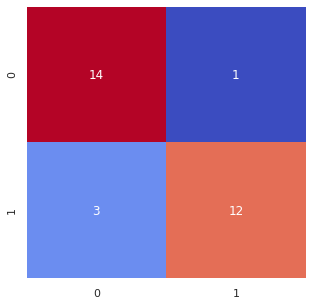

In [318]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [319]:
acc = metrics.accuracy_score(testY,preds)
acc

0.8666666666666667

In [320]:
indexes = np.random.randint(0,30,25)
indexes

array([ 8, 26, 11,  7, 20,  2, 24, 25, 22, 28,  8,  5, 22, 12,  7,  3, 28,
       11, 23, 29,  3, 17, 19, 22, 17])

In [0]:
labels = []

for i in indexes:
  pred = le.inverse_transform(preds)[i]
  labels.append(pred)

In [322]:
labels

['healthy',
 'parkinson',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'healthy',
 'healthy',
 'parkinson',
 'healthy',
 'healthy',
 'healthy',
 'parkinson',
 'healthy',
 'parkinson',
 'parkinson',
 'healthy',
 'healthy',
 'parkinson',
 'parkinson',
 'healthy']

In [0]:
results = []

for i in range(25):
  image = outputs[i]

  if labels[i] == 'healthy':
    color = (0,255,0)
  else:
    color = (0,0,255)

  text = str(labels[i])

  image = cv2.resize(image,(128,128))
  cv2.putText(image,text,(3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)

  results.append(image)


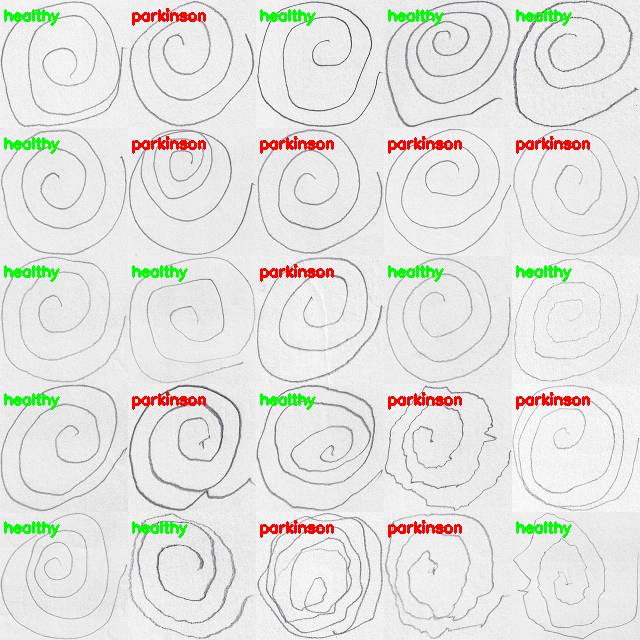

-1

In [324]:
montage = build_montages(results,(128,128),(5,5))[0]

cv2_imshow(montage)
cv2.waitKey(0)